In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
import json
import urllib.request

prod= pd.read_csv('../data/new_product.csv')
cust= pd.read_csv('../data/new_custom.csv')
mast= pd.read_csv('../data/new_master.csv')
sess= pd.read_csv('../data/new_session.csv')
lotte_list = pd.read_csv('../data/lotte_luxury_list.csv')
sear1 = pd.read_csv('../data/new_search1.csv')

In [0]:
prod['PD_BRA_NM'] = prod['PD_BRA_NM'].map(lambda x: x.split('(')[0].replace('[','').replace(']','').replace(' ',''))
prod.loc[prod['PD_BRA_NM']=='MADE IN ITALY','PD_BRA_NM'] = 'V73'
prod.loc[prod['PD_BRA_NM'].isin(['1909535','19330640825']),'PD_BRA_NM'] = 'KL'
prod.loc[prod['PD_BRA_NM']=='19386640906','PD_BRA_NM'] = '지이크'
prod.loc[prod['PD_BRA_NM'].isin(['1907517','1924113','1906469','1906471','1902295','1908178','1881326','1924116','1906492','1902287']),'PD_BRA_NM'] = 'CC collect'
prod.loc[prod['PD_BRA_NM'].isin(['19379580904','19364580830','1872892','1898551','18703070925','19359410830']),'PD_BRA_NM'] = '더아이잗'
prod.loc[prod['PD_BRA_NM'].isin(['1904418','1896342']),'PD_BRA_NM'] = '보니스팍스'
prod.loc[prod['PD_BRA_NM'].isin(['1912506','1912518']),'PD_BRA_NM'] = '리스트'
prod.loc[prod['PD_BRA_NM']=='19326280823','PD_BRA_NM'] = 'ENC'
prod.loc[prod['PD_BRA_NM'].isin(['19266920905','19266920905','19266920905']),'PD_BRA_NM'] = '요하넥스'
prod.loc[prod['PD_BRA_NM']=='1913802','PD_BRA_NM'] = '꼼빠니아'
prod.loc[prod['PD_BRA_NM']=='1917759','PD_BRA_NM'] = '인디안'

prod_mast = pd.merge(prod, mast, how = 'inner', on=['PD_C'])

# df[df['PD_BUY_CT']>=150000].sort_values(by=['PD_BUY_AM'],ascending=False)
cate_list= ['패션잡화','여성의류','화장품/뷰티케어','남성의류']
prod_mast1 = prod_mast[prod_mast['CLAC1_NM'].isin(cate_list)]

prod_mast1_sess = pd.merge(prod_mast1, sess, how = 'inner', on=['CLNT_ID', 'SESS_ID'])
df = prod_mast1_sess[prod_mast1_sess['PD_BRA_NM'].isin(lotte_list['BRA_NM'])]

In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
import json
from google.colab import drive 
import urllib.request
from pandas.io.json import json_normalize
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
prod_mast = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/trend_score.csv')
sess = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Session.csv')
# sess.dropna(inplace = True)
sess['TOT_SESS_HR_V'] = pd.to_numeric(sess['TOT_SESS_HR_V'].str.replace(',',''))
sess['SESS_HR_PAG_VIEW'] = sess['TOT_SESS_HR_V'] / sess['TOT_PAG_VIEW_CT']
sess['MONTH'] = sess['SESS_DT'].map(lambda x : str(x)[:4] + '-' + str(x)[4:6])
# cust = pd.read_csv('gdrive/My Drive/공모전/Lpoint/data/Custom.csv')
df = pd.merge(prod_mast, sess, how = 'inner', on=['CLNT_ID', 'SESS_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697754 entries, 0 to 697753
Data columns (total 22 columns):
CLNT_ID             697754 non-null int64
SESS_ID             697754 non-null int64
HITS_SEQ            697754 non-null int64
PD_C                697754 non-null int64
PD_ADD_NM           697754 non-null object
PD_BRA_NM           697754 non-null object
PD_BUY_AM           697754 non-null int64
PD_BUY_CT           697754 non-null int64
PD_NM               697754 non-null object
CLAC1_NM            697754 non-null object
CLAC2_NM            697754 non-null object
CLAC3_NM            697754 non-null object
TREND_SC            697754 non-null float64
SESS_SEQ            697754 non-null int64
SESS_DT             697754 non-null int64
TOT_PAG_VIEW_CT     697696 non-null float64
TOT_SESS_HR_V       695272 non-null float64
DVC_CTG_NM          697754 non-null object
ZON_NM              697754 non-null object
CITY_NM             697754 non-null object
SESS_HR_PAG_VIEW    695270 non-nul

In [0]:
# 최신성
# 9월 1.0, 8월 0.9, 7월 0.8, 6월 0.7, 5월 0.6, 4월 0.5

#월을 추출
df['month'] = df['SESS_DT'].map(lambda x : int(str(x)[4:6]))
#SESS_ID마다 지수를 설정
df['fe1_test'] = (df['month']+1)/10
#지수 추합
fe1 = df[['PD_C', 'fe1_test']].groupby(by='PD_C').sum()

In [0]:
df['cnt'] = 1

In [0]:
# 관심도 => 시간
# 1600~1700 이 0점 # mean:1648.329964

#SESS_ID마다 지수를 설정
df['fe2_test'] = (df.SESS_HR_PAG_VIEW - np.nanmean(df.SESS_HR_PAG_VIEW))/100

In [0]:
# 관심도1 => 시간
# 1600~1700 이 0점 # mean:1648.329964

#SESS_ID마다 지수를 설정
df['fe2_1_test'] = (df.TOT_SESS_HR_V - np.nanmean(df.TOT_SESS_HR_V))/100


In [0]:
# 관심도2 => 총페이지조회건수
# 50~100 이 0점 # mean : 92.700773

#SESS_ID마다 지수를 설정
df['fe2_2_test'] = (df['TOT_PAG_VIEW_CT'] - np.nanmean(df['TOT_PAG_VIEW_CT']))/100


In [10]:
df.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,...,ZON_NM,CITY_NM,SESS_HR_PAG_VIEW,MONTH,month,fe1_test,cnt,fe2_test,fe2_1_test,fe2_2_test
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,42.952381,2018-05,5,0.6,1,0.205296,-8.254123,-0.800536
1,4139680,7605037,28,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,42.952381,2018-05,5,0.6,1,0.205296,-8.254123,-0.800536
2,4139680,7605037,12,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,42.952381,2018-05,5,0.6,1,0.205296,-8.254123,-0.800536
3,4139680,7605037,28,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,42.952381,2018-05,5,0.6,1,0.205296,-8.254123,-0.800536
4,4139680,7605037,12,401577,색상:몰리 와우,바비브라운,39000,1,[한정판] 크러쉬드 립칼라 2.0 - 몰리 와우,화장품/뷰티케어,...,Seoul,Seoul,42.952381,2018-05,5,0.6,1,0.205296,-8.254123,-0.800536


In [47]:
df1 = df.groupby(['CLAC3_NM','PD_BRA_NM']).agg({'TREND_SC':'mean','fe1_test':'mean','fe2_test':'mean','fe2_1_test':'mean','fe2_2_test':'mean'}).reset_index()
df1['fe2_1_test'].fillna(min(df1['fe2_1_test']), inplace=True)
df1.head()

,CLAC3_NM,PD_BRA_NM,TREND_SC,fe1_test,fe2_test,fe2_1_test,fe2_2_test
0,2단우산,루이까또즈,31.624072,0.750000,-0.099049,-8.431623,-0.318036
1,2단우산,엘르,4.156726,0.700000,-0.130485,0.255877,0.859464
2,2단우산,탠디,0.422276,0.616667,-0.021133,-1.433567,-0.248869
3,3단우산,탠디,0.474579,0.711111,-0.021391,-1.735234,-0.222758
4,BB/파운데이션/컴팩트류,SK-II,25.999873,0.752459,-0.005290,-0.259680,-0.023905


In [0]:
a0 = 1.5*df1['TREND_SC'].quantile(.75)
a1 = 1.5*df1['fe2_test'].quantile(.75)
a = 1.5*df1['fe2_1_test'].quantile(.75)
b = 1.5*df1['fe2_1_test'].quantile(.25)
a2 = 1.5*df1['fe2_2_test'].quantile(.75)
b2 = 1.5*df1['fe2_2_test'].quantile(.25)

df1.loc[df1['TREND_SC'] >= a0, 'TREND_SC'] = a0
df1.loc[df1['fe2_test'] >= a2,'fe2_test'] = a1
df1.loc[df1['fe2_1_test'] >= a,'fe2_1_test'] = a
df1.loc[df1['fe2_1_test'] <= b,'fe2_1_test'] = b
df1.loc[df1['fe2_2_test'] >= a2,'fe2_2_test'] = a2
df1.loc[df1['fe2_2_test'] <= b2,'fe2_2_test'] = b2

In [0]:
def normalize(x):
  return (x-min(x))/(max(x)-min(x))

In [0]:
def normalize2(x):
  return (x-np.mean(x))/np.std(x)

In [0]:
df1['LABEL'] = df1[['PD_BRA_NM','CLAC3_NM']].apply(lambda x:f'{x[0]}_{x[1]}', axis=1)

In [0]:
df1['TREND_SC'] = normalize2(df1['TREND_SC'])
df1['fe1_test'] = normalize2(df1['fe1_test'])
df1['fe2_test'] = normalize2(df1['fe2_test'])
df1['fe2_1_test'] = normalize2(df1['fe2_1_test'])
df1['fe2_2_test'] = normalize2(df1['fe2_2_test'])

In [0]:
df1['관심도1'] = (df1['fe2_1_test']+df1['fe2_2_test'])/2
df1['관심도'] = df1['fe2_test']
df1['인기도'] = df1['TREND_SC']
df1['최신성'] = df1['fe1_test']
df1['SCORE'] = normalize(df1['관심도']+df1['인기도']+df1['최신성'])
df1['SCORE2'] = normalize(df1['관심도1']+df1['인기도']+df1['최신성'])

In [54]:
df1.describe()

,TREND_SC,fe1_test,fe2_test,fe2_1_test,fe2_2_test,관심도1,관심도,인기도,최신성,SCORE,SCORE2
count,4.157000e+03,4.157000e+03,4.155000e+03,4.157000e+03,4.157000e+03,4.157000e+03,4.155000e+03,4.157000e+03,4.157000e+03,4155.000000,4157.000000
mean,-4.102243e-17,4.546653e-16,2.052109e-17,-2.051122e-17,1.367414e-17,-2.734829e-17,2.052109e-17,-4.102243e-17,4.546653e-16,0.458261,0.468020
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,9.198586e-01,1.000120e+00,1.000120e+00,1.000120e+00,0.146985,0.167882
min,-1.186012e+00,-2.173241e+00,-2.641198e+00,-1.415718e+00,-1.449916e+00,-1.432817e+00,-2.641198e+00,-1.186012e+00,-2.173241e+00,0.000000,0.000000
25%,-8.574097e-01,-5.046154e-01,-5.869707e-01,-8.857956e-01,-8.627907e-01,-7.426882e-01,-5.869707e-01,-8.574097e-01,-5.046154e-01,0.364704,0.361724
50%,-3.734687e-01,-4.953567e-02,-2.832789e-02,-3.032816e-03,-1.940810e-02,-2.153300e-03,-2.832789e-02,-3.734687e-01,-4.953567e-02,0.447000,0.465869
75%,7.820584e-01,5.222312e-01,5.595583e-01,9.626221e-01,9.996982e-01,7.919731e-01,5.595583e-01,7.820584e-01,5.222312e-01,0.559527,0.579466
max,1.766124e+00,2.319213e+00,3.540851e+00,1.356908e+00,1.343818e+00,1.350363e+00,3.540851e+00,1.766124e+00,2.319213e+00,1.000000,1.000000


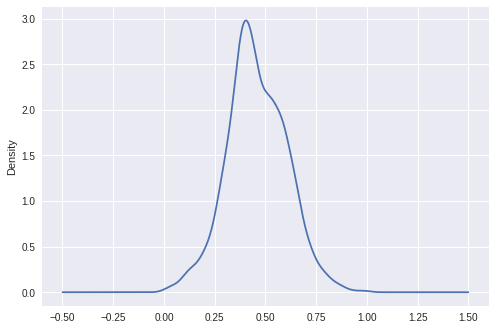

In [55]:
df1['SCORE'].plot.density()

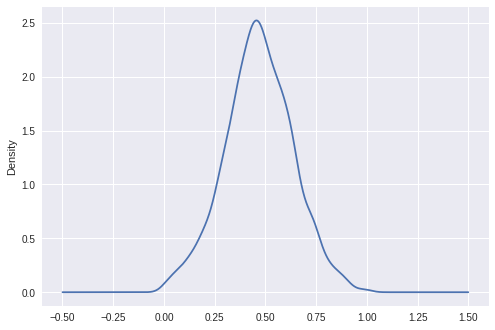

In [56]:
df1['SCORE2'].plot.density()

In [0]:
df_f = df1[['LABEL','SCORE']]
df_f2 = df1[['LABEL','SCORE2']]
df_f.to_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score1.csv',index=False)
df_f2.to_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score2.csv',index=False)

In [58]:
df_f.head()

,LABEL,SCORE
0,루이까또즈_2단우산,0.502302
1,엘르_2단우산,0.213063
2,탠디_2단우산,0.249058
3,탠디_3단우산,0.320640
4,SK-II_BB/파운데이션/컴팩트류,0.583466


In [59]:
df_f2.head()

,LABEL,SCORE2
0,루이까또즈_2단우산,0.528833
1,엘르_2단우산,0.432991
2,탠디_2단우산,0.199661
3,탠디_3단우산,0.284555
4,SK-II_BB/파운데이션/컴팩트류,0.628091
